In [29]:
from __future__ import division, print_function, absolute_import    
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import PIL
import matplotlib.patches as patches



In [30]:
#load dataset
dir="C:/Datasets Temp/raccoon_dataset/"
def load_data(file):
    df=pd.read_csv(dir+file)
    temp=[]
    width,height,xmin,xmax,ymin,ymax=[],[],[],[],[],[]
    var=0
    for i in np.array(df['filename']):
        im= Image.open(dir+"images/"+i)
        x,y=im.size
        
        im=im.resize((227,227))
        x1,y1=im.size
        rx,ry=x1/x,y1/y
        width.append(np.array(df['width'])[var]*rx)
        height.append(np.array(df['height'])[var]*ry)
        xmin.append(np.array(df['xmin'])[var]*rx)
        ymin.append(np.array(df['ymin'][var]*ry))
        xmax.append(np.array(df['xmax'])[var]*rx)
        ymax.append(np.array(df['ymax'])[var]*ry)
        im=np.array(im)
        if(im.shape==(227,227,3)):
            temp.append(im)
        var=var+1
    return np.array(temp),np.array(width),np.array(height),np.array(df['class']),np.array(xmin),np.array(ymin),np.array(xmax),np.array(ymax)
images_train,width_train,height_train,clas_train,xmin_train,ymin_train,xmax_train,ymax_train=load_data("data/train_labels.csv")

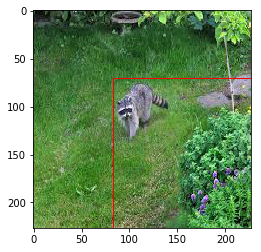

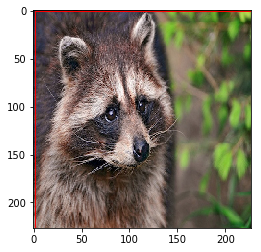

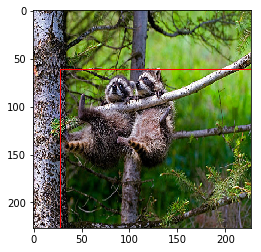

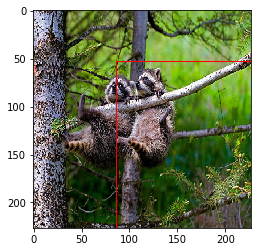

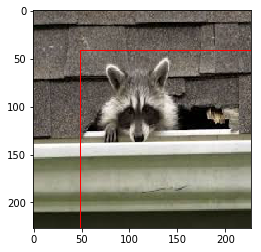

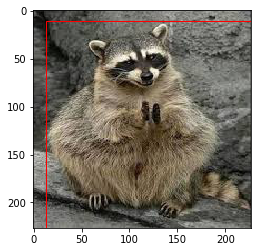

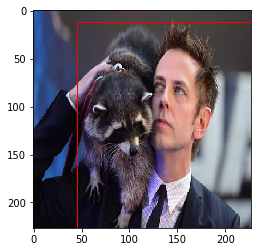

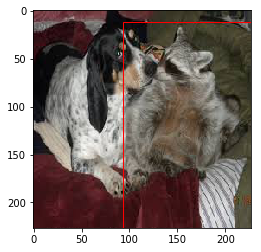

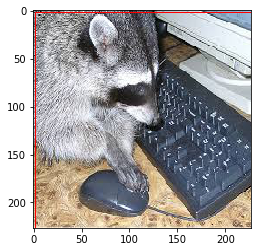

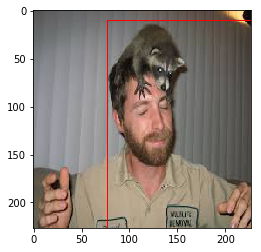

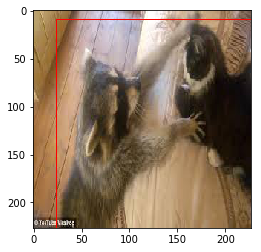

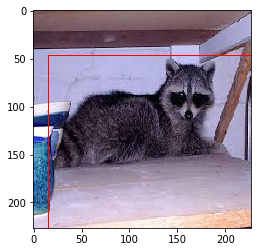

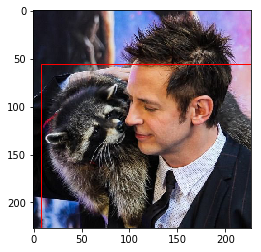

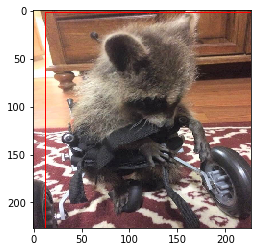

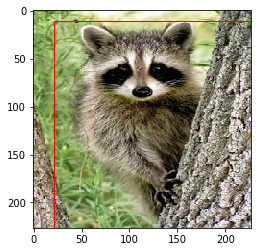

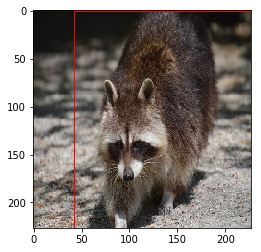

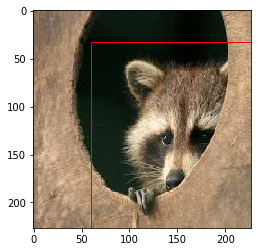

In [33]:
#Train plot test
for i in range(0,int(len(images_train)/10)):
    rect = patches.Rectangle((xmin_train[i],ymin_train[i]),width_train[i],height_train[i],linewidth=1,edgecolor='r',facecolor='none')
    fig,ax = plt.subplots(1)
    ax.add_patch(rect)
    ax.imshow(images_train[i])


In [34]:
learning_rate = 0.001
num_steps = 200
batch_size = 173
display_step = 10
num_input = 227*227*3
dropout = 0.75

In [28]:
images = tf.placeholder(tf.float32, [None, num_input])
xmin= tf.placeholder(tf.float32, [None, 1])
ymin=tf.placeholder(tf.float32,[None,1])
width=tf.placeholder(tf.float32,[None,1])
height=tf.placeholder(tf.float32,[None,1])
keep_prob = tf.placeholder(tf.float32)#dropout probabilty


In [42]:
#wrapper conv
def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)
#wrapper maxpool
def maxpool2d(x,s,k):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, s, s, 1],padding='SAME')

In [44]:
def conv_net(x, weight, biase, dropout):
    x=tf.reshape(x,shape=[-1,227,227,3])
    conv1=conv2d(x,weight['w1'],biase['b1'])
    conv1=tf.nn.tanh(conv1)
    conv1=maxpool2d(conv1,3,2)
    conv2=conv1(conv1,weight['w2'],biase['b2'])
    conv2=tf.nn.tanh(conv2)
    conv2=maxpool2d(conv2,3,2)
    conv3=conv1(conv2,weight['w3'],biase['b3'])
    conv3=tf.nn.tanh(conv3)
    conv4=conv1(conv3,weight['w4'],biase['b4'])
    conv4=tf.nn.tanh(conv4)
    conv5=conv1(conv4,weight['w5'],biase['b5'])
    conv5=tf.nn.tanh(conv5)
    conv5=maxpool2d(conv5,3,2)
    fc1 = tf.reshape(conv5, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out